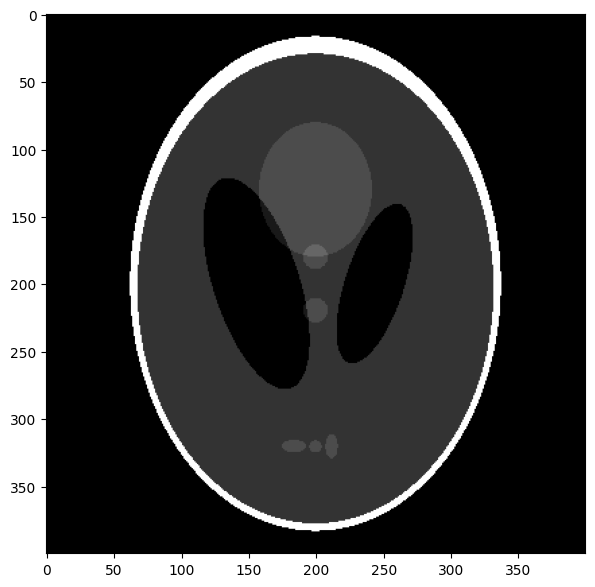

In [1]:
import torch
from torch_radon24 import Radon
# import libraries
import matplotlib
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom

plt.rcParams["figure.figsize"] = [7, 7]
import numpy as np


img = shepp_logan_phantom()

# define some constants
batch_size = 1
n_angles = 512
device = torch.device("cuda")


image_size = img.shape[0]
image = torch.FloatTensor(img).to(device)[None, None]

_ = plt.imshow(img, cmap="gray")

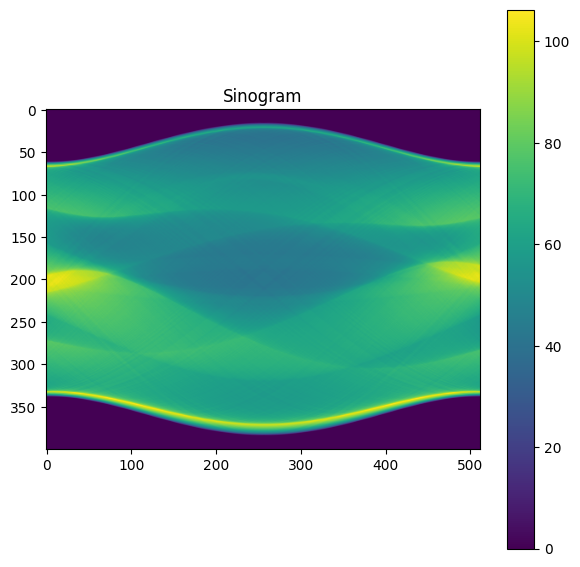

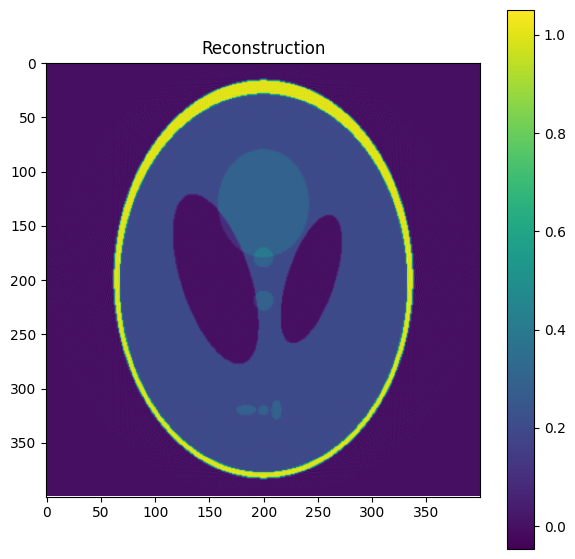

In [2]:
n_angles = 512

image_size = image.shape[-1]
radon_op = Radon(n_angles=n_angles, image_size=image_size, circle=True, device=device)

# apply radon transformation
sino = radon_op(image)
plt.imshow(sino[0, 0].cpu())
plt.colorbar()
plt.title("Sinogram")
plt.show()

# apply filtered backprojection
reconstructed = radon_op.filter_backprojection(sino)
plt.imshow(reconstructed[0, 0].cpu())
plt.colorbar()
plt.title("Reconstruction")
plt.show()

In [3]:
print("FBP Relative Error", (torch.norm(image - reconstructed) / torch.norm(reconstructed)).item())

FBP Relative Error 0.12606287002563477
